<a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  /></a>

# Data Visualization Lab


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Connect to Database


Download database file.


In [1]:
import wget
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
file_name = wget.download(url, out='../data/')

100% [........................................................................] 36679680 / 36679680

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect('../data/m4_survey_data.sqlite') # open a database connection

Import pandas module.


In [3]:
import pandas as pd

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


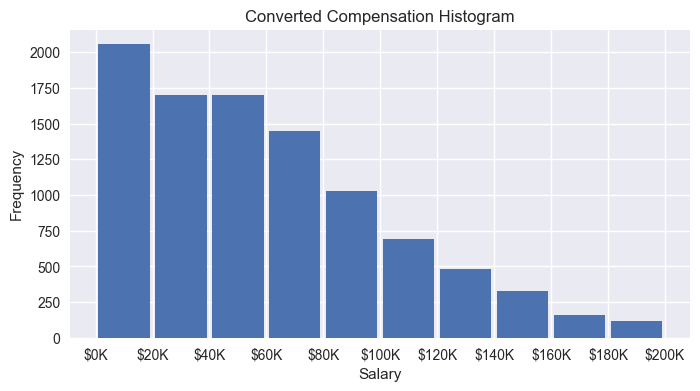

In [4]:
# Your code here
query = """
select ConvertedComp
from master
"""
comp_df = pd.read_sql_query(query, conn)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

bin_edges = [x for x in range(0, 220000, 20000)]
bin_lbls = ["$" + str(x)[:-4] + "0K" for x in bin_edges]
comp_df['ConvertedComp'].plot.hist(bins=bin_edges, rwidth=0.9, xlabel='Salary', title='Converted Compensation Histogram', figsize=(8,4))
plt.xticks(ticks=bin_edges, labels=bin_lbls)
plt.show()

### Box Plots


Plot a box plot of `Age.`


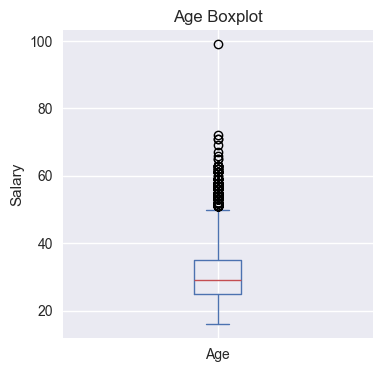

In [5]:
# Your code here
query = """
select Age
from master
"""
age_df = pd.read_sql_query(query, conn)

age_df['Age'].plot.box(ylabel='Salary', title='Age Boxplot', figsize=(4,4))
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [6]:
# Your code here
# Initial inquiries of WorkWeekHrs showed that a number of rows have invalid data, as shown below.
query = """
select Age, WorkWeekHrs
from master
"""
age_hrs_df = pd.read_sql_query(query, conn)
pd.DataFrame(age_hrs_df['WorkWeekHrs'].describe())

,WorkWeekHrs
count,11276.000000
mean,42.064606
std,24.672741
min,3.000000
25%,40.000000
50%,40.000000
75%,43.000000
max,1012.000000


In [7]:
# Your code here
# Drop all rows with a WorkWeekHrs value > 168 - the total number of hours in a week.
age_hrs_df = age_hrs_df[age_hrs_df['WorkWeekHrs'] <= 168]

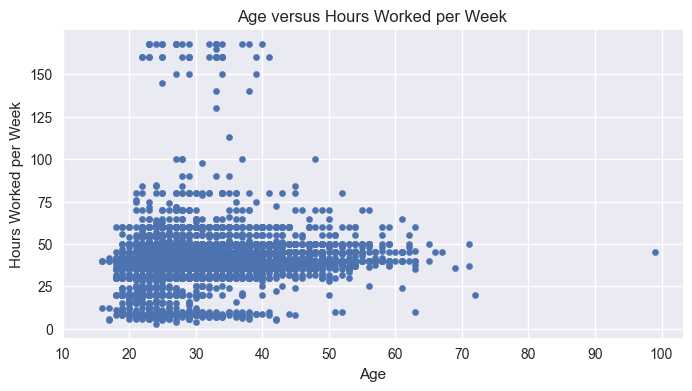

In [8]:
# Your code here
x_lbls = [x for x in range(10, 110, 10)]
y_lbls = [x for x in range(0, 175, 25)]
age_hrs_df.plot.scatter(x='Age', y='WorkWeekHrs', title='Age versus Hours Worked per Week', figsize=(8,4))
plt.ylabel('Hours Worked per Week')
plt.xticks(ticks=x_lbls, labels=x_lbls)
plt.yticks(ticks=y_lbls, labels=y_lbls)
plt.show()

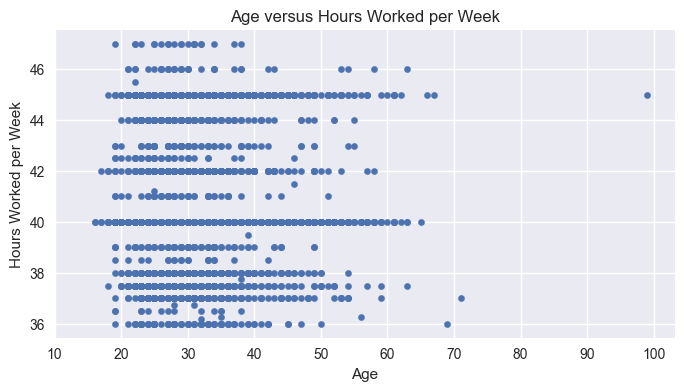

In [9]:
# Your code here
# Let's redo after removing WorkWeekHrs outliers
comp_1q_hrs = age_hrs_df['WorkWeekHrs'].quantile(.25)
comp_3q_hrs = age_hrs_df['WorkWeekHrs'].quantile(.75)
comp_iqr_hrs = comp_3q_hrs - comp_1q_hrs
comp_up_hrs = comp_3q_hrs + (1.5 * comp_iqr_hrs)
comp_low_hrs = comp_1q_hrs - (1.5 * comp_iqr_hrs)
age_hrs_df = age_hrs_df[(age_hrs_df['WorkWeekHrs'] < comp_up_hrs) & (age_hrs_df['WorkWeekHrs'] > comp_low_hrs)]

x_lbls = [x for x in range(10, 110, 10)]
age_hrs_df.plot.scatter(x='Age', y='WorkWeekHrs', title='Age versus Hours Worked per Week', figsize=(8,4))
plt.ylabel('Hours Worked per Week')
plt.xticks(ticks=x_lbls, labels=x_lbls)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


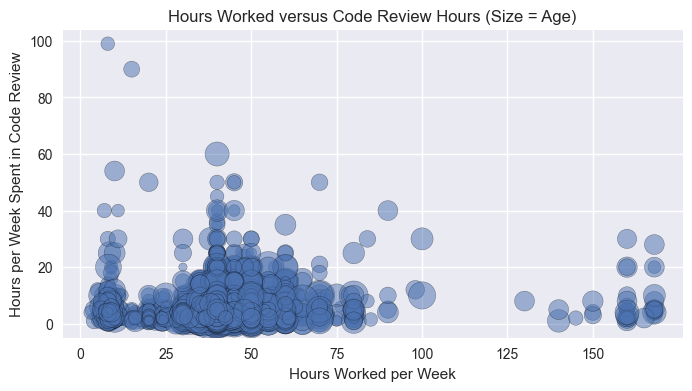

In [10]:
# Your code here
query = """
select Age, WorkWeekHrs, CodeRevHrs
from master
"""
age_hrs_rev_df = pd.read_sql_query(query, conn)
age_hrs_rev_df = age_hrs_rev_df[age_hrs_rev_df['WorkWeekHrs'] <= 168]

norm_age = (age_hrs_rev_df['Age'] - age_hrs_rev_df['Age'].min()) / (age_hrs_rev_df['Age'].max() - age_hrs_rev_df['Age'].min())
x_lbls = [x for x in range(0, 175, 25)]
ax = age_hrs_rev_df.plot.scatter(x='WorkWeekHrs', y='CodeRevHrs', s=norm_age*1000, alpha=0.5, edgecolors='black', figsize=(8,4))
plt.title('Hours Worked versus Code Review Hours (Size = Age)')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Hours per Week Spent in Code Review')
plt.xticks(ticks=x_lbls, labels=x_lbls)
plt.show()

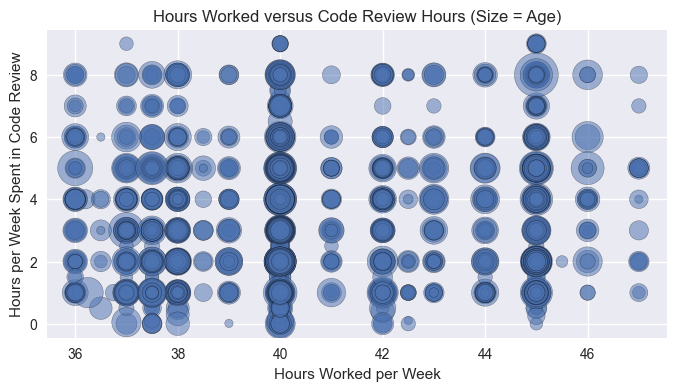

In [11]:
# Your code here
# Let's redo after removing WorkWeekHrs and CodeRevHrs outliers
comp_1q_hrs = age_hrs_rev_df['WorkWeekHrs'].quantile(.25)
comp_3q_hrs = age_hrs_rev_df['WorkWeekHrs'].quantile(.75)
comp_iqr_hrs = comp_3q_hrs - comp_1q_hrs
comp_up_hrs = comp_3q_hrs + (1.5 * comp_iqr_hrs)
comp_low_hrs = comp_1q_hrs - (1.5 * comp_iqr_hrs)
age_hrs_rev_df = age_hrs_rev_df[(age_hrs_rev_df['WorkWeekHrs'] < comp_up_hrs) & (age_hrs_rev_df['WorkWeekHrs'] > comp_low_hrs)]

comp_1q_rev = age_hrs_rev_df['CodeRevHrs'].quantile(.25)
comp_3q_rev = age_hrs_rev_df['CodeRevHrs'].quantile(.75)
comp_iqr_rev = comp_3q_rev - comp_1q_rev
comp_up_rev = comp_3q_rev + (1.5 * comp_iqr_rev)
comp_low_rev = comp_1q_rev - (1.5 * comp_iqr_rev)
age_hrs_rev_df = age_hrs_rev_df[(age_hrs_rev_df['CodeRevHrs'] < comp_up_rev) & (age_hrs_rev_df['CodeRevHrs'] > comp_low_rev)]

norm_age = (age_hrs_rev_df['Age'] - age_hrs_rev_df['Age'].min()) / (age_hrs_rev_df['Age'].max() - age_hrs_rev_df['Age'].min())
ax = age_hrs_rev_df.plot.scatter(x='WorkWeekHrs', y='CodeRevHrs', s=norm_age*1000, alpha=0.5, edgecolors='black', figsize=(8,4))
plt.title('Hours Worked versus Code Review Hours (Size = Age)')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Hours per Week Spent in Code Review')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


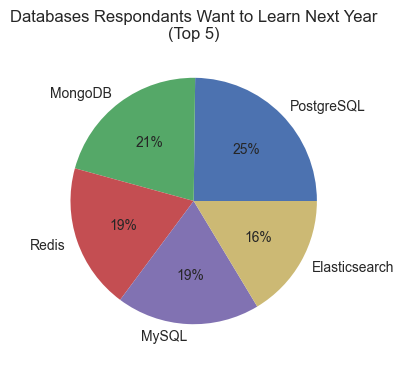

In [12]:
# Your code here
query = """
select DatabaseDesireNextYear, count(*) as Count
from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by Count desc
"""
db_desire_df = pd.read_sql_query(query, conn)

db_desire_df.set_index('DatabaseDesireNextYear', drop=True, inplace=True)
db_desire_df.head().plot.pie(y='Count', autopct='%.0f%%', legend=False, figsize=(4,4), ylabel='')
plt.title('Databases Respondants Want to Learn Next Year\n(Top 5)')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


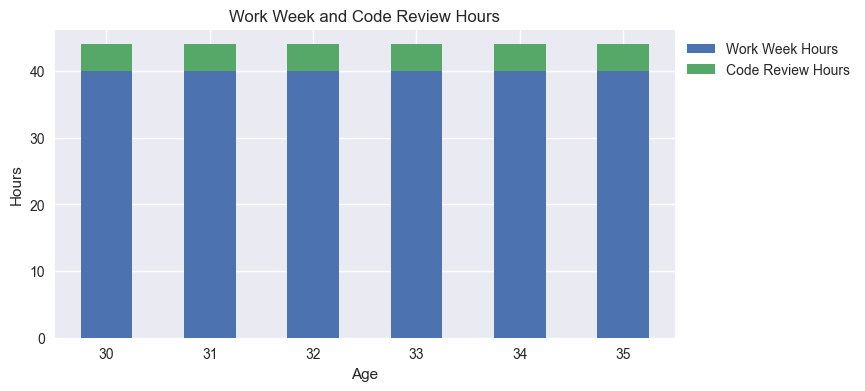

In [13]:
# Your code here
query = """
select Age, WorkWeekHrs, CodeRevHrs
from master
where Age between 30 and 35
"""
age_hrs_rev_df = pd.read_sql_query(query, conn)
age_hrs_rev_df = age_hrs_rev_df[age_hrs_rev_df['WorkWeekHrs'] <= 168]
plot_df = age_hrs_rev_df.groupby('Age').median()
plot_df.index = plot_df.index.astype('int')
plot_df.plot.bar(stacked=True, ylabel='Hours', title='Work Week and Code Review Hours', rot=0, figsize=(8,4))
plt.legend(['Work Week Hours', 'Code Review Hours'], bbox_to_anchor=(1, 1))
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


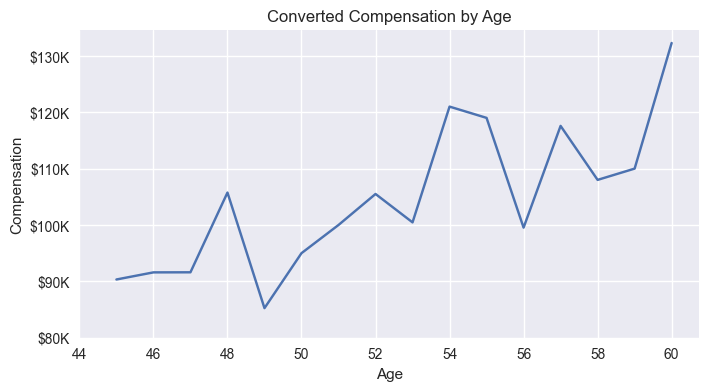

In [14]:
# Your code here
query = """
select Age, ConvertedComp
from master
where Age between 45 and 60
"""
age_comp_df = pd.read_sql_query(query, conn)
plot_df = age_comp_df.groupby('Age').median()
x_lbls = [x for x in range(44, 62, 2)]
y_ticks = [x for x in range(80000, 140000, 10000)]
y_lbls = ["$" + str(x)[:-4] + "0K" for x in y_ticks]
ax = plot_df.plot.line(title='Converted Compensation by Age', legend=False, figsize=(8,4))
plt.xticks(ticks=x_lbls, labels=x_lbls)
plt.yticks(ticks=y_ticks, labels=y_lbls)
plt.ylabel('Compensation')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


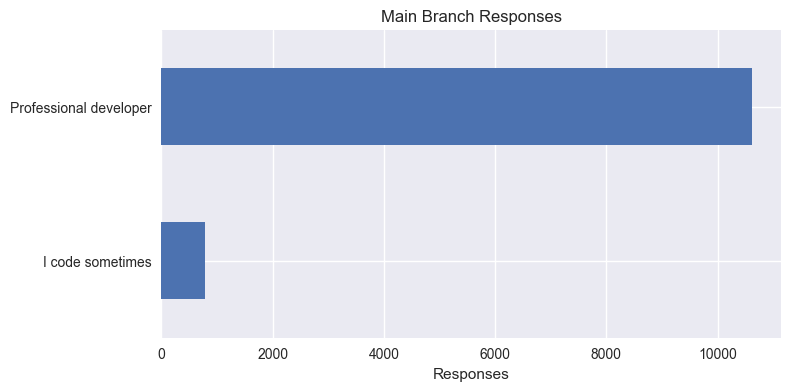

In [15]:
# Your code here
query = """
select MainBranch
from master
"""
main_br_df = pd.read_sql_query(query, conn)
plot_df = main_br_df.value_counts(ascending=True)
plot_df.plot.barh(ylabel='', xlabel='Responses', title='Main Branch Responses', figsize=(8,4))
plt.yticks(ticks=[0, 1], labels=['I code sometimes', 'Professional developer'])
plt.show()

Close the database connection.


In [16]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date              | Version  | Changed By        | Change Description                 |
| :---------------- | :------: | :---------------- | :--------------------------------- |
| 2024-May-22       | 0.2      | Tami McManus      | Completed cells per assingment     |
| 2020-Oct-17       | 0.1      | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
